In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import plotly.graph_objs as go
import yfinance as yf
start='1980-01-01'
end='2023-01-01'

In [3]:
df = yf.download("TSLA", start=start, end=end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500


In [4]:
df=df.reset_index()
df=df.drop(['Date','Adj Close'],axis=1)

In [5]:
ma200 =df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3145    255.097317
3146    254.317234
3147    253.603501
3148    252.876117
3149    252.091634
Name: Close, Length: 3150, dtype: float64

In [6]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma200)

In [7]:
train=pd.DataFrame(df['Close'])
print(train.shape)

(3150, 1)


In [8]:
test = yf.download(tickers='TSLA', period='5d', interval='5m')
test

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-07-11 09:30:00,268.649994,269.510010,267.230011,269.399811,269.399811,5335436
2023-07-11 09:35:00,269.359985,270.769989,269.179993,270.584412,270.584412,3129944
2023-07-11 09:40:00,270.601288,270.850006,267.959991,268.950012,268.950012,3281967
2023-07-11 09:45:00,268.910004,269.290009,267.799988,268.099915,268.099915,1983474
2023-07-11 09:50:00,268.087402,269.799988,267.609985,269.450104,269.450104,2182059
...,...,...,...,...,...,...
2023-07-17 13:30:00,286.450012,286.809998,286.450012,286.600006,286.600006,638094
2023-07-17 13:35:00,286.614288,286.989990,286.299988,286.359985,286.359985,915854
2023-07-17 13:40:00,286.379486,287.119995,286.363312,286.873688,286.873688,847986


In [9]:
test=test.reset_index()
test=test.drop(['Datetime','Adj Close'],axis=1)
test=pd.DataFrame(test['Close'])
print(test.shape)

(365, 1)


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train1=scaler.fit_transform(train)
train1.shape

(3150, 1)

In [11]:
x_train=[]
y_train=[]

for i in range(100,train1.shape[0]):
    x_train.append(train1[i-100:i])
    y_train.append(train1[i,0])
    
    
x_train,y_train=np.array(x_train),np.array(y_train)

In [12]:
x_train.shape

(3050, 100, 1)

In [13]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=70,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=90,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 70)           36680     
                                                                 
 dropout_2 (Dropout)         (None, 100, 70)           0         
                                                                 
 lstm_3 (LSTM)               (None, 90)                5

In [15]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
96/96 [==============================] - 25s 209ms/step - loss: 0.0127
Epoch 2/50
96/96 [==============================] - 20s 204ms/step - loss: 0.0051
Epoch 3/50
96/96 [==============================] - 20s 210ms/step - loss: 0.0038
Epoch 4/50
96/96 [==============================] - 26s 272ms/step - loss: 0.0037
Epoch 5/50
96/96 [==============================] - 25s 257ms/step - loss: 0.0036
Epoch 6/50
96/96 [==============================] - 21s 222ms/step - loss: 0.0034
Epoch 7/50
96/96 [==============================] - 26s 266ms/step - loss: 0.0030
Epoch 8/50
96/96 [==============================] - 21s 222ms/step - loss: 0.0033
Epoch 9/50
96/96 [==============================] - 24s 255ms/step - loss: 0.0028
Epoch 10/50
96/96 [==============================] - 21s 218ms/step - loss: 0.0032
Epoch 11/50
96/96 [==============================] - 23s 235ms/step - loss: 0.0030
Epoch 12/50
96/96 [==============================] - 21s 220ms/step - loss: 0.0029
Epoch 13/50
9

In [16]:
prev100=train
final_df=prev100.append(test,ignore_index=True)

<ipython-input-16-3385102fad31>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=prev100.append(test,ignore_index=True)


In [17]:
input_data=scaler.fit_transform(final_df)
input_data.shape

(3515, 1)

In [18]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)
y_pred=model.predict(x_test)

(3415, 100, 1)
(3415,)
107/107 [==============================] - 6s 46ms/step


In [19]:
y_pred.shape

(3415, 1)

In [20]:
scaler.scale_

array([0.00244549])

In [21]:
scale_f=1/float(scaler.scale_)
y_pred=y_pred*scale_f
y_test=y_pred*scale_f

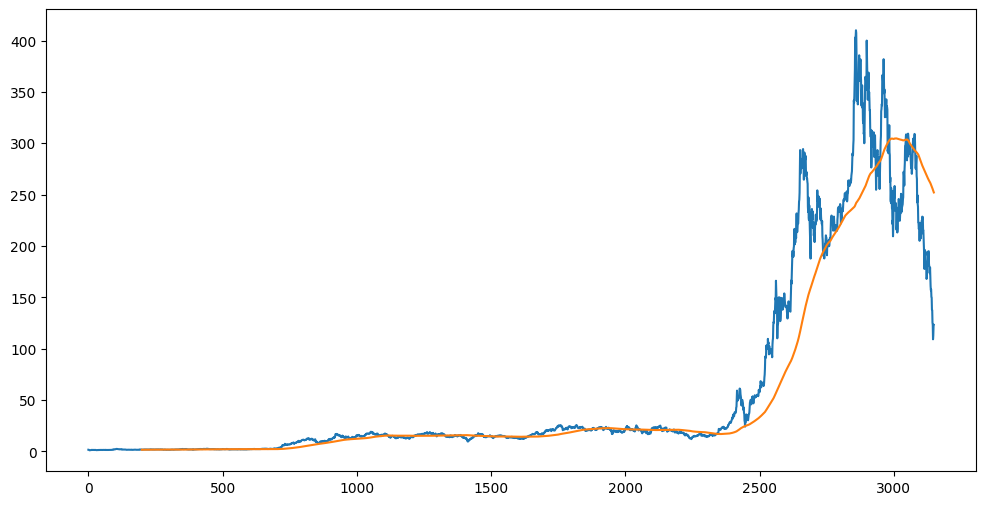

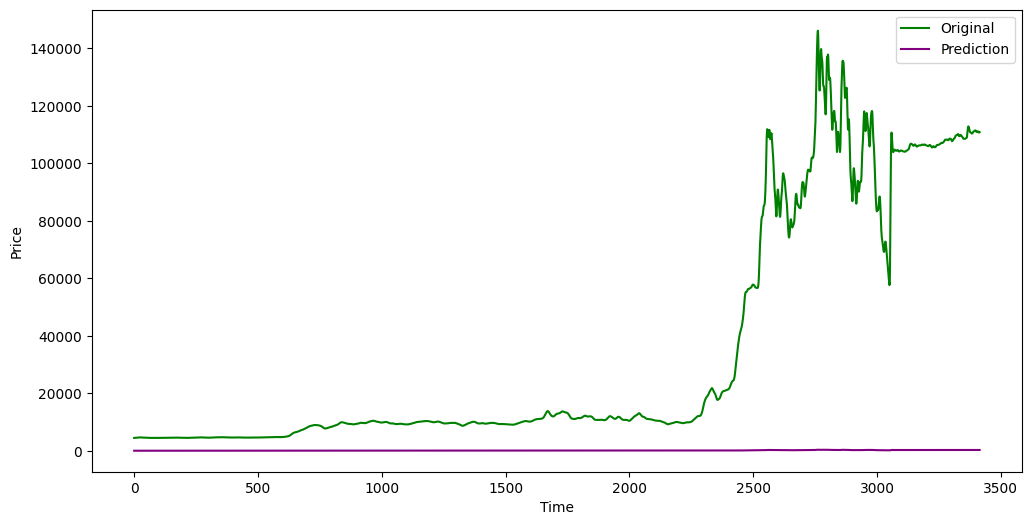

In [22]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'green',label='Original')
plt.plot(y_pred,'purple',label='Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [22]:
model.save('keras_model.h5')